In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
def generate_data(N, dim=32, attention_col=1):
    x = np.random.standard_normal(size=(N, dim))
    y = np.random.randint(low=0, high=3, size=(N, 1))
    x[:, attention_col] = y[:, 0]
    return x, y

In [3]:
class Net(nn.Module):
    def __init__(self, ndim=32):
        super(self, Net).__init__()
        self.attention = nn.Linear(ndim, ndim)
        self.out = nn.Linear(ndim, 1)
        
    def attn(self, x):
        p = F.softmax(self.attention(x))
        return p
        
    def forward(self, x):
        x = x*self.attn(x)
        x = self.out(x)
        return x

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import re
import pandas as pd
import seaborn as sns
import datetime

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [5]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import gensim

In [6]:
f = open("input.txt")
ds = f.read()
f.close()

In [7]:
syms = ['"', ';', ':', ',', '?', '!', '&', '(', ')', '[', ']', "'", '$', '@', '~', '-', '#']
syms_2 = ['\n', '\t', '_', '>', '<', '      ', '    ']

In [8]:
data = []

In [9]:
for ix in ds.split('.')[:]:
    val = ix
    for s in syms:
        val = val.strip().replace(s, '')
    for s in syms_2:
        val = val.strip().replace(s, ' ')
    if len(val) <1000 and len(val)>40:
        data.append(val.lower())

In [10]:
len(data)

26121

In [11]:
for ix in data[-10:]:
    print (ix.split())
    print ('-'*30)

['but', 'its', 'gods', 'own', 'wind', 'none', 'the', 'less', 'and', 'a', 'cleaner', 'better', 'stronger', 'land', 'will', 'lie', 'in', 'the', 'sunshine', 'when', 'the', 'storm', 'has', 'cleared']
------------------------------
['start', 'her', 'up', 'watson', 'for', 'its', 'time', 'that', 'we', 'were', 'on', 'our', 'way']
------------------------------
['i', 'have', 'a', 'check', 'for', 'five', 'hundred', 'pounds', 'which', 'should', 'be', 'cashed', 'early', 'for', 'the', 'drawer', 'is', 'quite', 'capable', 'of', 'stopping', 'it', 'if', 'he', 'can']
------------------------------
['this', 'text', 'is', 'provided', 'to', 'you', 'asis', 'without', 'any', 'warranty']
------------------------------
['no', 'warranties', 'of', 'any', 'kind', 'expressed', 'or', 'implied', 'are', 'made', 'to', 'you', 'as', 'to', 'the', 'text', 'or', 'any', 'medium', 'it', 'may', 'be', 'on', 'including', 'but', 'not', 'limited', 'to', 'warranties', 'of', 'merchantablity', 'or', 'fitness', 'for', 'a', 'particula

In [12]:
train = []
for ix in data[:]:
    train.append(ix.lower().split())

In [13]:
model = gensim.models.Word2Vec(train, workers=6, iter=20)

In [14]:
model.similar_by_word('face')

/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/home/gautam/.local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('eyes', 0.8033992052078247),
 ('eye', 0.7671215534210205),
 ('gaze', 0.7561370134353638),
 ('expression', 0.7357604503631592),
 ('brow', 0.6856746673583984),
 ('lips', 0.6785587668418884),
 ('figure', 0.6714811325073242),
 ('head', 0.6700893640518188),
 ('eyebrows', 0.6611854434013367),
 ('cheek', 0.6544615626335144)]

In [15]:
w = 'horse car engine travel'.split()

In [16]:
m = np.zeros((len(w), len(w)))
for ix in range(len(w)):
    for wx in range(len(w)):
        m[ix, wx] = model.similarity(w[ix], w[wx])

/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
/home/gautam/.local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['horse', 'car', 'engine', 'travel']


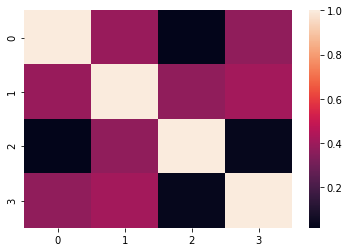

In [17]:
import seaborn as sns
print( w)
sns.heatmap(m)